### Homework 3: Exploring Musicals in IMDb
Name:  Veronica Alejandro
   
UT EID:  vaa678
    
Date:  3 Mar 2023

Data, data everywhere, and not a insight to spare!  The internet movie database (IMDb) was one of the first really cool things to hit the internet in the 1990's.  If you are interested, read a little bit about this history of the website on its [wikipedia entry](https://en.wikipedia.org/wiki/IMDb).

Today, the data that powers the IMDb website is [available](https://www.imdb.com/interfaces/) for personal and non-commercial use. The file `imdb_musicals.csv` that comes with this assignment was made by fetching the data (Feb 2021), filtering out just the movies that included "Musical" as a genre, and merging that data with the average ratings and number of votes. The column for `tconst (string) - alphanumeric unique identifier of the title`; it is named `uid` (a common name for the unique identifier, or database key).  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('imdb_musicals.csv')

In [2]:
df.head()

,uid,title,year,runtime_mins,ave_rating,num_votes
0,tt0009771,The Merry Widow,1920.0,70.0,4.7,14.0
1,tt0016029,The Little Colonel,1935.0,81.0,7.1,1460.0
2,tt0016906,Frivolinas,2014.0,80.0,5.6,15.0
3,tt0018037,The Jazz Singer,1927.0,88.0,6.5,9080.0
4,tt0018893,The Five O'Clock Girl,1928.0,NaN,8.5,43.0


#### Question 1 - Data Wrangling

Each item in our table has the following attributes:
  - `uid` 
  - `title`
  - `year`
  - `runtime_mins`
  - `ave_rating`
  - `num_votes`
  
We want to visualize how this attributes interact with each other.  Some of these attributes are missing for some of the movies in our data set.  Perform "list wise deletion", aka, drop all the rows from the table that are missing any values. Use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Check your work by verifying there are $5306$ movies remaining in the dataframe

In [3]:
df = df.dropna()

In [4]:
df.shape

(5306, 6)

#### Question 2 - What _is_ good?

Movies are rated on a 1-10 scale, but in our musical data set we want to understand what those distributions of the ratings look like.  

Plot a histogram of the ratings. Use 18 bins in your histogram.  

Set the x-axis label to "Average Rating". 

Set the title of the plot to "Distribution of Musical Ratings".

What is the median rating? Mark that on the histogram.

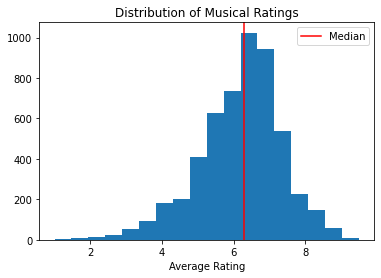

In [5]:
n, bins, patches = plt.hist(df['ave_rating'], 18)
plt.xlabel('Average Rating')
plt.title('Distribution of Musical Ratings')
median = np.array(df['ave_rating'].median())
plt.axvline(x=median, color='red', label='Median')
plt.legend()
plt.show()

I would say anything above the median, so around 6.5 to 7 and above. 

#### Question 3 - Has our attention span changed? 

Plot the mean runtime of the musical as a function of year. 

Have musicals gotten longer, shorter, or stayed the same?

Set the y-axis label to "Average Runtime". 

Set the title of the plot to "Average Musical Runtimes Over the Years".

The year on the x-axis should be formatted properly (this is the year 2021, not the year 2,021). The x-axis should start at the min of the year in the dataset. 

In [6]:
df_attn = df.groupby('year').mean().reset_index()
df_attn['year'] = df_attn['year'].astype('int64')
df_attn

,year,runtime_mins,ave_rating,num_votes
0,1910,60.000000,3.800000,8.000000
1,1920,70.000000,4.700000,14.000000
2,1927,96.500000,6.350000,4644.500000
3,1929,89.333333,6.446667,551.044444
4,1930,84.352941,6.089412,343.305882
...,...,...,...,...
91,2017,104.947368,6.469737,7238.447368
92,2018,108.506667,6.372000,2935.133333
93,2019,104.735294,6.166176,226.529412
94,2020,108.854167,6.512500,1074.145833


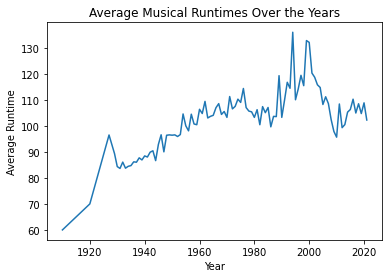

In [7]:
plt.plot(df_attn['year'], df_attn['runtime_mins'])
plt.xlabel('Year')
plt.ylabel('Average Runtime')
plt.title('Average Musical Runtimes Over the Years')
plt.show()

It doesn't really seem that our attention spans have decreased. I think the levels from 2000s to now are similar from years 1960 to 1990. There was an increase in musical runtimes around the later 90 snad early 2000s, then a decrease. But overall, there isn't a major decrease from 1910 to now. 

#### Question 4 - When were Musicals made?

Visualize the number of musicals made each year using an area chart.

The y-axis should be labeled "Count of Musicals".

The graph should be titled "Number of Musicals Made by Year".

The year on the x-axis should be formatted properly.

In [8]:
df_mus = df['year'].value_counts().to_frame().reset_index()
df_mus.columns = ['year', 'count']
df_mus = df_mus.sort_values(by = 'year')
df_mus['year'] = df_mus['year'].astype('int64')
df_mus

,year,count
94,1910,1
95,1920,1
93,1927,2
63,1929,45
8,1930,85
...,...,...
19,2017,76
21,2018,75
33,2019,68
57,2020,48


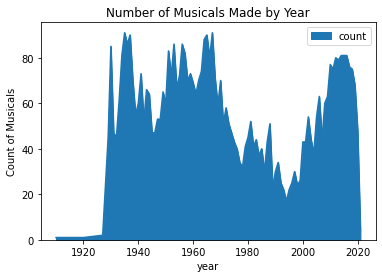

In [9]:
df_mus.plot.area(x = 'year', title = 'Number of Musicals Made by Year')
plt.ylabel('Count of Musicals')
plt.show()

I think the highest amount of musicals were made in the 1930s and 1940s, as well as during the 1960s and some of the 1970s. I think it definitely tapers off as movies became more mainstream and cameras were more accessible. There was a rise in musicals in the 2010s however.  

#### Question 5 - Explore the Musicals by Popularity

Create a scatter plot, where each dot is a musical.  

The position of the musical is encoded by year (x-axis), and average rating (y-axis). 

The size (area) of the dot should encode the number of votes it received on IMDb. Scale the radius of the dot accordingly.

The y-axis should be labeled "Average Rating".

The graph should be titled "Scatter plot of Musicals".

The year on the x-axis should be formatted properly.


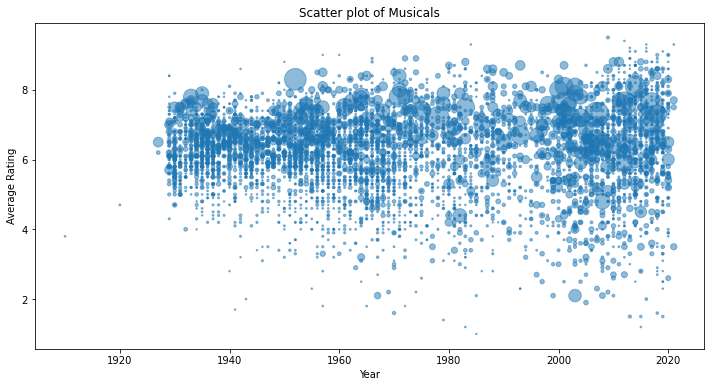

In [12]:
df['year'] = df['year'].astype('int64')

plt.figure(figsize = (12, 6))
plt.scatter(x = df['year'], y = df['ave_rating'], s = np.sqrt(df['num_votes']), alpha = 0.5)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Scatter plot of Musicals')
plt.show()